#classificaton
https://www.learnpytorch.io/02_pytorch_classification/

## 1. classfication data

In [66]:
import sklearn

In [67]:
from sklearn.datasets import make_circles

#Make 1000 samples
n_samples =1000

# create circles
X, y = make_circles(n_samples, noise=0.03,
                    random_state=42)

In [68]:
len(X), len(y)

(1000, 1000)

In [69]:
print(f" first 5 samples:\n {X[:5]}")
print(f" first 5 samples: \n {y[:5]}")

 first 5 samples:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
 first 5 samples: 
 [1 1 1 1 0]


In [70]:
#MAKE A DATA FREAME OF CIRCLE
import pandas as pd
circle = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label": y})
circle.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


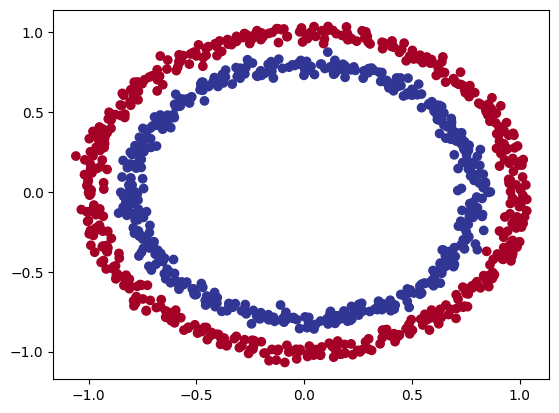

In [71]:
#Vusualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0]
             ,y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 1.1 check input and putput shapes

In [72]:
X.shape, y.shape

((1000, 2), (1000,))

In [73]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [74]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Sample input features: {X_sample}")
print(f"Sample target label: {y_sample}")
print(f"Sample input features shape: {X_sample.shape}")

Sample input features: [0.75424625 0.23148074]
Sample target label: 1
Sample input features shape: (2,)


###1.2 Turen the dta in test and train splits

In [75]:
import torch
torch.__version__

'2.6.0+cu124'

In [76]:
type(X)

numpy.ndarray

In [77]:
#turen data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [78]:
X.dtype

torch.float32

In [79]:
torch.manual_seed(42)

In [80]:
#Split data into training ans test cases
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)


In [81]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

##2. Building a model

Let's build a model to classifi out blue or red dots.

To do so, we want to:
1. Setup the device agnostic code so out code will run on the available gpu device i there is on
2. Construct a model (Subclasing nn module)
3. Define a loss functuon and optimizer
4. Create a training and test loop



In [82]:
#! device setup
import torch
from torch import nn

#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

from os import stat_result
#Construct the model
1. Suclasses `nn.Modle` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that ar ecapable of handling shape of data
3.Define a `foward()` method that outlines the foward pass
4. Instantiate an instace of out model class and send it to the target `device`

In [83]:
#Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create 2 nn,Linear layers capable of handling the shapes of our data
    #self.layer_1 = nn.Linear(in_features=2, out_features=5)
    #self.layer_2 = nn.Linear(in_features=5, out_features=2)
    self.two_linear_layers=nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5,out_features=1)
    )

  #3. Define a forward() method that outlines the forward pass
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    #return self.layer_2(self.layer_1(x)) #x -> layer_1 -> layer_2
    return self.two_linear_layers(x)

#4. Instantiate an instance of our model class nad send it to the target device
model_0 = CircleModelV0().to(device)

In [84]:
model_0,device


(CircleModelV0(
   (two_linear_layers): Sequential(
     (0): Linear(in_features=2, out_features=5, bias=True)
     (1): Linear(in_features=5, out_features=1, bias=True)
   )
 ),
 'cuda')

In [85]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [86]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [87]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [88]:
#make preds
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of preds: {len(untrained_preds)}")
print(f"Shape of preds: {untrained_preds.shape}")
print(f"Shape of test: {y_test.shape}")
print(f"First 10 preds: {untrained_preds[:10]}")
print(f"First 10 actuals: {y_test[:10]}")

Length of preds: 200
Shape of preds: torch.Size([200, 1])
Shape of test: torch.Size([200])
First 10 preds: tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')
First 10 actuals: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


###2.1 stup a loss unction and optimizer

Which loss function or optimizer should you use?

For problems like prediction continous numbers for regression use MSE or MAE

For problems like cross entropy or categorical cross entropy

In [89]:
loss_fn = nn.BCEWithLogitsLoss() # this has built in sigmoid

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [90]:
#Calculate accuracy -
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/ len(y_pred)) * 100
  return acc


##3. Training Model

1. Training a model build training loop
2. Forward pass
3. cal loss
4. Opimizer zero grad
5. Loss backward
6. Optimizer step (gradient decent)

###3.1 Going from raw logits -> prediction pobablities -> prediction labels

Our model outputs are going to be raw **logits**

we can convert these **logit** into predictio probs by passing them into some kind of activation function (e.g sigmode for binary cross entroy)
and softmax for mulit class classification

In [91]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [92]:
#Use sigmoid on activation function
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [93]:
y_preds=torch.round(y_pred_probs)

In [94]:
#Find the predicted probabs in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)[:5])))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))


tensor([True, True, True, True, True], device='cuda:0')


### 3.2 building training and testing loops


In [95]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)

#Set the number of epochs
epochs = 100

X_train,X_test,y_train,y_test = X_train.to(device),X_test.to(device),y_train.to(device),y_test.to(device)
for epoch in range(epochs):
  model_0.train()

  #1forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. calculate loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train,y_pred)

  #3 optimizer zero grab
  optimizer.zero_grad()


  #4 backward pass
  loss.backward()

  optimizer.step()

  #testing model
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)
  #Print
  if epoch % 10 == 0 :
    print(f"Epoch : {epoch} | loss: {loss}  |  Acc : {acc} | test_loss: {test_loss} | test_acc: {test_acc}")






Epoch : 0 | loss: 0.6979604959487915  |  Acc : 51.87500000000001 | test_loss: 0.6945955753326416 | test_acc: 57.49999999999999
Epoch : 10 | loss: 0.6976765394210815  |  Acc : 52.0 | test_loss: 0.6943801045417786 | test_acc: 57.99999999999999
Epoch : 20 | loss: 0.6974151730537415  |  Acc : 52.0 | test_loss: 0.6941846013069153 | test_acc: 57.49999999999999
Epoch : 30 | loss: 0.697174072265625  |  Acc : 52.0 | test_loss: 0.6940073370933533 | test_acc: 56.49999999999999
Epoch : 40 | loss: 0.6969515085220337  |  Acc : 51.625 | test_loss: 0.6938462853431702 | test_acc: 56.49999999999999
Epoch : 50 | loss: 0.696745753288269  |  Acc : 51.37500000000001 | test_loss: 0.6937000155448914 | test_acc: 56.00000000000001
Epoch : 60 | loss: 0.6965552568435669  |  Acc : 51.37500000000001 | test_loss: 0.693567156791687 | test_acc: 56.00000000000001
Epoch : 70 | loss: 0.6963787078857422  |  Acc : 51.37500000000001 | test_loss: 0.6934463381767273 | test_acc: 56.49999999999999
Epoch : 80 | loss: 0.696214795

##4. Model inspection since model is not learining

From the model it is not learning

VIsuals and predictions

In [96]:
import requests
from pathlib import Path

#DOwnload helper functio lrom lear pytorch
if(Path("helper_functions.py").is_file()):
  print("hellper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


hellper_functions.py already exists, skipping download


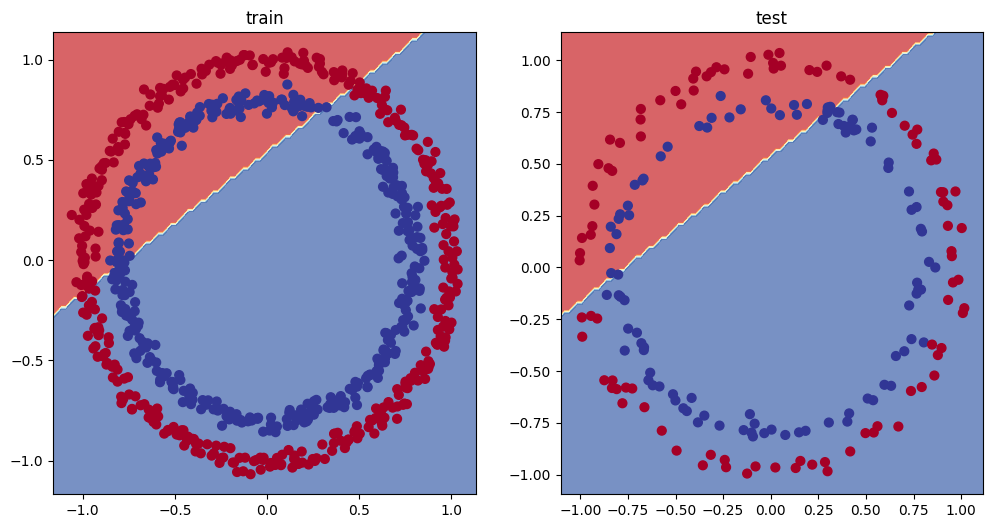

In [97]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)

In [98]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layers=nn.Sequential(
        nn.Linear(in_features=2, out_features=10),
        nn.Linear(in_features=10, out_features=10),
        nn.Linear(in_features=10, out_features=1)
    )
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layers(x)
model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [99]:
#Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

#Create an optimizer
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.01)


In [100]:
from re import L
#write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Training
epochs = 1000

#Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc= accuracy_fn(y_true=y_train, y_pred=y_pred)

  #3. Optimier zero
  optimizer.zero_grad()

  #4. loss backward (back propag)
  loss.backward()

  #5. optimizer step
  optimizer.step()

  #Testing
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_true=y_test, y_pred = test_pred)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Acc: {acc} | test_loss: {test_loss} | test_acc: {test_acc}")

Epoch: 0 | Loss: 0.6939550638198853 | Acc: 50.875 | test_loss: 0.6943049430847168 | test_acc: 50.0
Epoch: 100 | Loss: 0.6929798722267151 | Acc: 51.125 | test_loss: 0.6946931481361389 | test_acc: 46.0
Epoch: 200 | Loss: 0.6929798722267151 | Acc: 51.0 | test_loss: 0.6946793794631958 | test_acc: 46.0
Epoch: 300 | Loss: 0.6929798722267151 | Acc: 51.0 | test_loss: 0.6946795582771301 | test_acc: 46.0
Epoch: 400 | Loss: 0.6929798722267151 | Acc: 51.0 | test_loss: 0.6946795582771301 | test_acc: 46.0
Epoch: 500 | Loss: 0.6929798722267151 | Acc: 51.0 | test_loss: 0.6946795582771301 | test_acc: 46.0
Epoch: 600 | Loss: 0.6929798722267151 | Acc: 51.0 | test_loss: 0.6946795582771301 | test_acc: 46.0
Epoch: 700 | Loss: 0.6929798722267151 | Acc: 51.0 | test_loss: 0.6946795582771301 | test_acc: 46.0
Epoch: 800 | Loss: 0.6929798722267151 | Acc: 51.0 | test_loss: 0.6946795582771301 | test_acc: 46.0
Epoch: 900 | Loss: 0.6929798722267151 | Acc: 51.0 | test_loss: 0.6946795582771301 | test_acc: 46.0


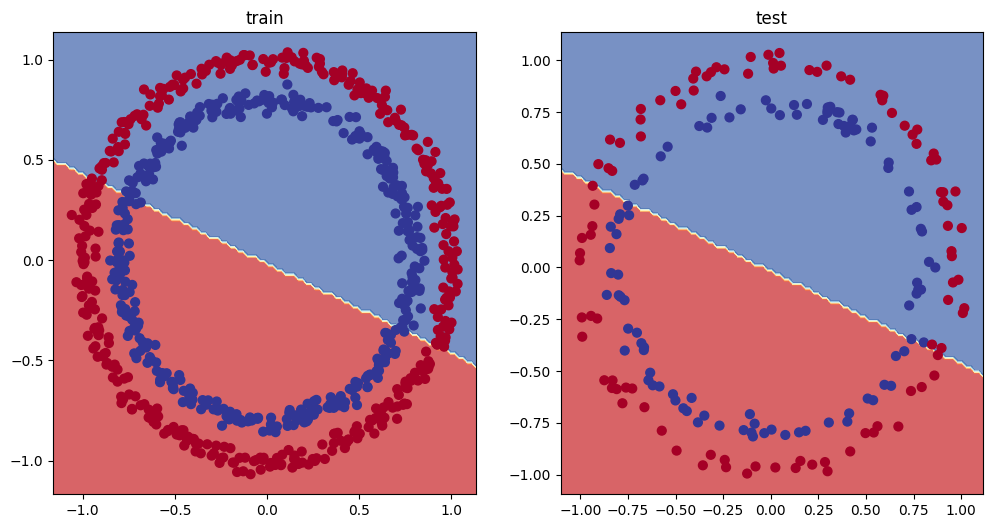

In [101]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1, X_test, y_test)

In [102]:
##5.1 Prep data

weight= 0.7
bias = 0.3
start = 0
end =1

#create data
x_regression = torch.arange(start, end, 0.01).unsqueeze(dim=1)
y_regression = weight * x_regression + bias

print(f"Shape of X: {x_regression.shape}")
print(f"Shape of y: {y_regression.shape}")

Shape of X: torch.Size([100, 1])
Shape of y: torch.Size([100, 1])


In [103]:
#create train and test split
train_split = int(0.8 * len(x_regression))
x_train_regression, y_train_regression = x_regression[:train_split], y_regression[:train_split]
x_test_regression, y_test_regression = x_regression[train_split:], y_regression[train_split:]

len(x_train_regression), len(y_train_regression), len(x_test_regression), len(y_test_regression)

(80, 80, 20, 20)

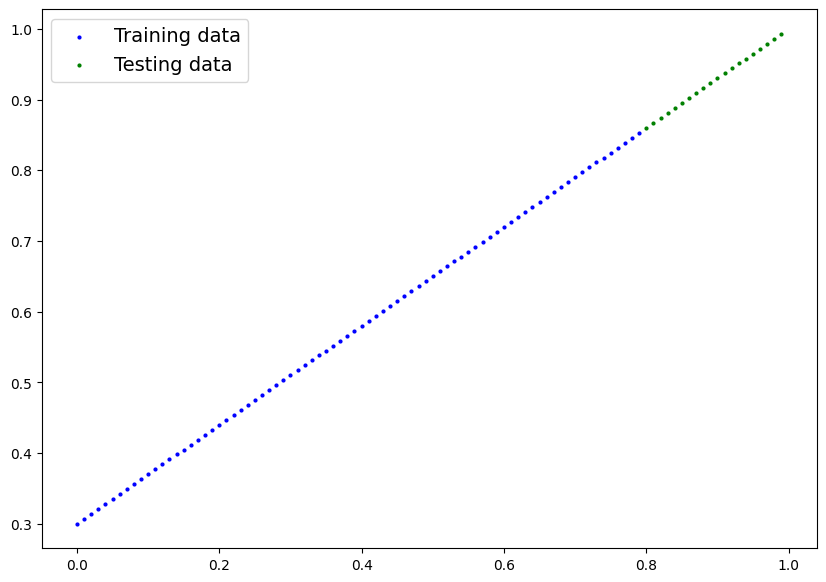

In [104]:
plot_predictions(train_data=x_train_regression,
                 train_labels=y_train_regression,
                 test_data=x_test_regression,
                 test_labels=y_test_regression,
                 predictions=None)

###5.2 model to fit the straight line data


In [105]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [106]:
#loss
loss_fn = nn.L1Loss()

#optim
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.001)

In [107]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#SET the number of epocj
epochs = 100

#put the data on device
x_train_regression, y_train_regression = x_train_regression.to(device), y_train_regression.to(device)
x_test_regression, y_test_regression = x_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epoch):
  model_2.train()

  y_pred= model_2(x_train_regression).squeeze()

  loss = loss_fn(y_pred, y_train_regression)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(x_test_regression).squeeze()
    test_loss = loss_fn(test_pred, y_test_regression)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | test_loss: {test_loss}")





/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([80, 1])) that is different to the input size (torch.Size([80])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 0 | Loss: 0.7598585486412048 | test_loss: 0.9496515989303589
Epoch: 100 | Loss: 0.40299803018569946 | test_loss: 0.5405147671699524
Epoch: 200 | Loss: 0.20029503107070923 | test_loss: 0.24887003004550934
Epoch: 300 | Loss: 0.16774830222129822 | test_loss: 0.15104559063911438
Epoch: 400 | Loss: 0.16245704889297485 | test_loss: 0.132893905043602
Epoch: 500 | Loss: 0.1597592532634735 | test_loss: 0.13706481456756592
Epoch: 600 | Loss: 0.15755781531333923 | test_loss: 0.14673039317131042
Epoch: 700 | Loss: 0.1556423157453537 | test_loss: 0.15738750994205475
Epoch: 800 | Loss: 0.15396007895469666 | test_loss: 0.16778545081615448
Epoch: 900 | Loss: 0.15247683227062225 | test_loss: 0.17763297259807587


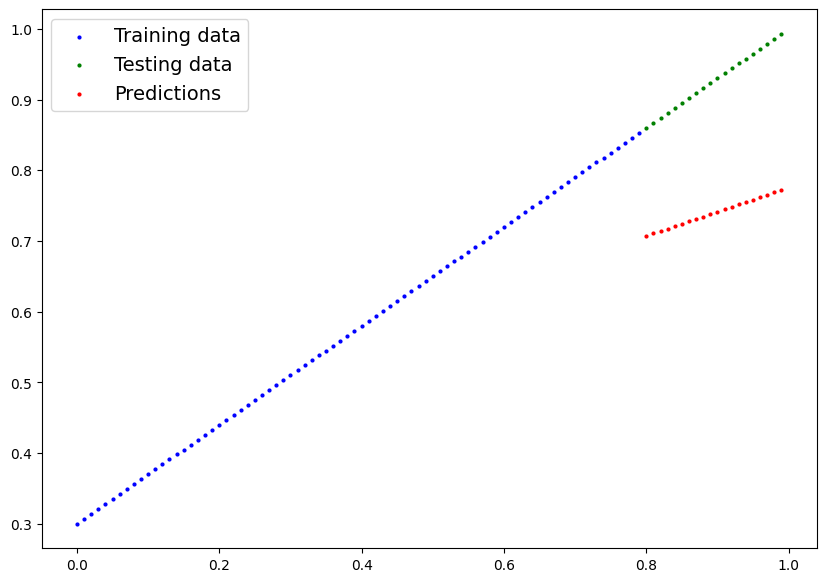

In [108]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(x_test_regression).squeeze()

plot_predictions(x_train_regression.cpu(), y_train_regression.cpu(), x_test_regression.cpu(), y_test_regression.cpu(), y_preds.cpu())


##6. missing piece of the fuction: non-linearity

"what patterns could you draw  if you were give infinite amout if a straing and non straingt lines"

## 6.1 Recreating non-linear data(red and blue circles)

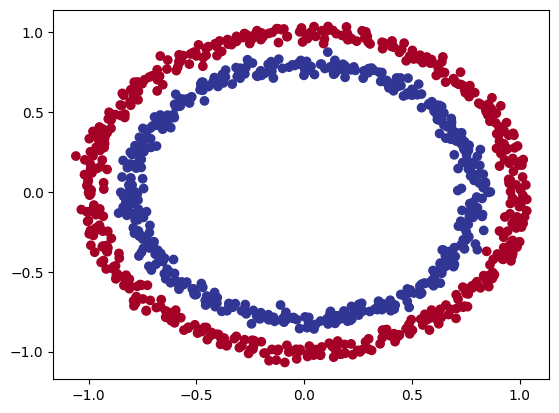

In [109]:
#Make and plot data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise= 0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


In [110]:
#COnvert data to tensors
import torch

from sklearn.model_selection import train_test_split

x = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)



##6.2 Builiding a model with non linearity

* Linear = straingth line
* non linear = non-straight lines

In [111]:
#3 build a model with non linear function
from torch import nn
class circleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3= nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return  self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=circleModelV2().to(device)

model_3

circleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [112]:
#loss fucnctions
loss_fn = nn.BCEWithLogitsLoss()

#optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(), lr = 0.1)

In [113]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

# Ensure y_train and y_test have the correct shape (remove extra dimension)
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)


for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(x_train).squeeze()

  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculate loss with correct target shape
  loss = loss_fn(y_logits, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate test loss with correct target shape
    test_loss = loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_test,test_pred)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Acc: {acc} | test_loss: {test_loss} | test_acc: {test_acc}")

Epoch: 0 | Loss: 0.6929463148117065 | Acc: 51.0 | test_loss: 0.6931881308555603 | test_acc: 50.0
Epoch: 100 | Loss: 0.691152811050415 | Acc: 51.0 | test_loss: 0.6910240054130554 | test_acc: 52.5
Epoch: 200 | Loss: 0.6897744536399841 | Acc: 51.0 | test_loss: 0.6893961429595947 | test_acc: 55.00000000000001
Epoch: 300 | Loss: 0.6879494190216064 | Acc: 51.0 | test_loss: 0.6872316002845764 | test_acc: 56.00000000000001
Epoch: 400 | Loss: 0.6851678490638733 | Acc: 51.0 | test_loss: 0.6841148734092712 | test_acc: 56.49999999999999
Epoch: 500 | Loss: 0.6810224652290344 | Acc: 51.0 | test_loss: 0.6794120073318481 | test_acc: 56.49999999999999
Epoch: 600 | Loss: 0.675148606300354 | Acc: 51.0 | test_loss: 0.6728507876396179 | test_acc: 56.00000000000001
Epoch: 700 | Loss: 0.6665886640548706 | Acc: 51.0 | test_loss: 0.6632164120674133 | test_acc: 59.0
Epoch: 800 | Loss: 0.6515955328941345 | Acc: 51.0 | test_loss: 0.647568941116333 | test_acc: 67.5
Epoch: 900 | Loss: 0.6236233115196228 | Acc: 51.0

In [114]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(x_test))).squeeze().cpu()



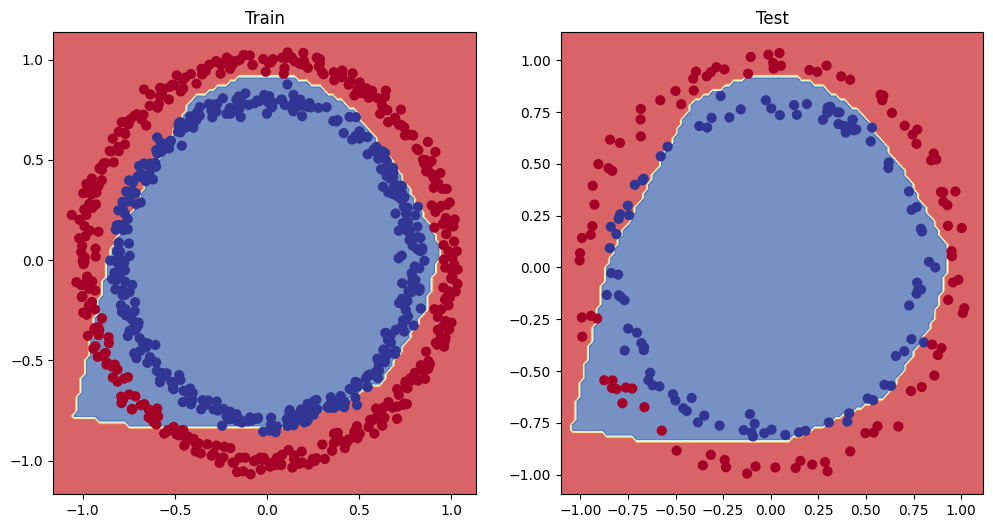

In [115]:
#plot the decision boundaries

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, x_test,y_test)

## 7. Replicating non-linear functions
Linear and non-liner Function

In [116]:
#create a tensor
A= torch.arange(-10, 10, 1, dtype= torch.float32)
A.dtype

torch.float32

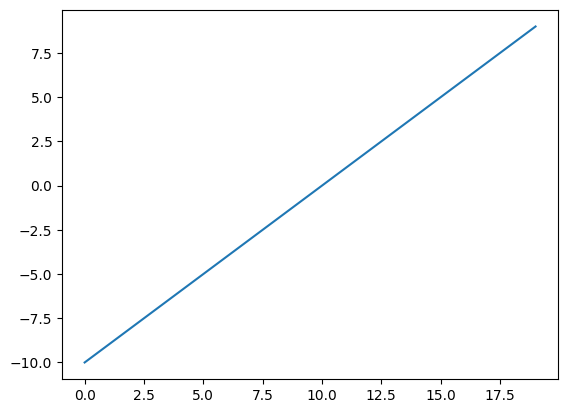

In [117]:
plt.plot(A)

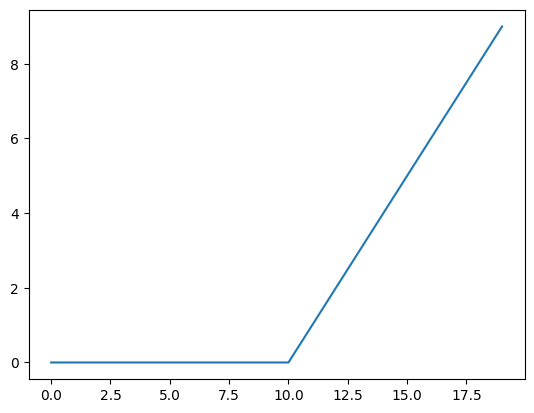

In [118]:
plt.plot(torch.relu(A))

In [119]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

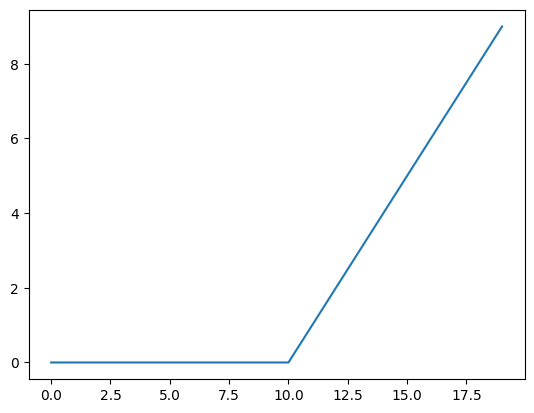

In [120]:
plt.plot(relu(A))

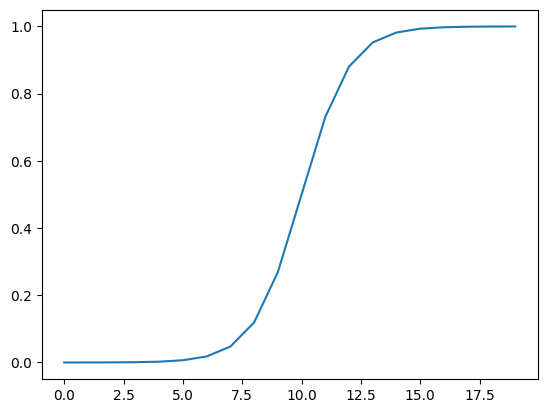

In [121]:
plt.plot(torch.sigmoid(A))

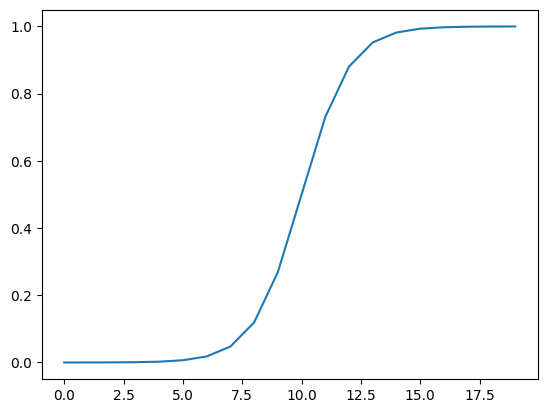

In [122]:
def sigmoid(x : torch.Tensor) -> torch.Tensor:
  return 1/(1+torch.exp(-x))
plt.plot(sigmoid(A))

##8. Putting all together with multi class classiication
* Binary classification = one thing or another
*Multi class classification, Many classes to classify

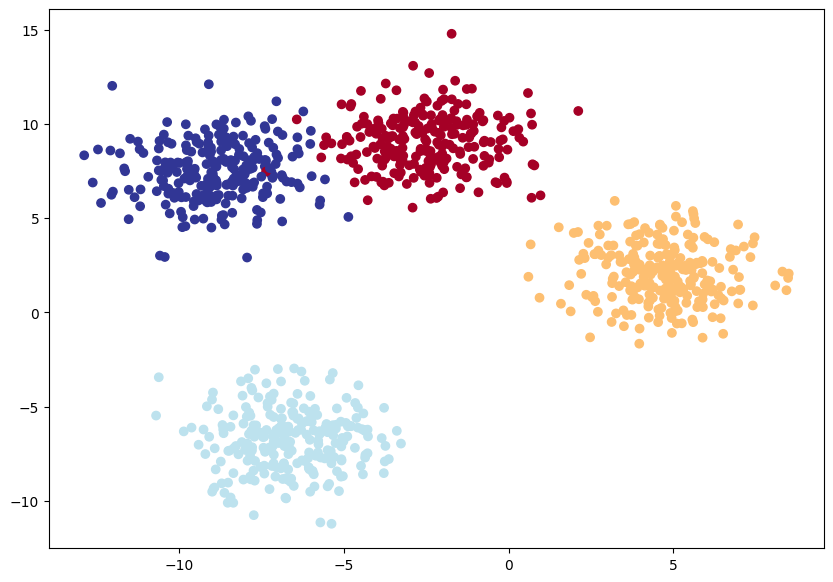

In [188]:
###8.1 Creating a toy data set
import torch
import matplotlib.pyplot as plt
from sklearn.datasets  import make_blobs
from sklearn.model_selection import train_test_split

#Set hyper param for our model
NUM_CLASSES= 4
NUM_FEATURES =2
RANDOM_SEED = 42

#1 create ,ulticlass data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features=NUM_FEATURES,
                            centers =NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

#CONVERT TO TENSOR
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#2 split the data
X_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state= RANDOM_SEED)

# 4. Plot data (visual)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)



## 8.2 Building a multi-class classification model in PyTorch

In [189]:
#device agnositic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [190]:
class BlobModel(nn.Module):
  def __init__(self,input_features, output_features, hidden_units=8):

    """
    Args : input fetures of model
    out put features of model
    hidden units of the model

    Returns:

    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)

    )

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer_stack(x)

model_4= BlobModel(input_features=2,
                   output_features=4,
                   hidden_units=8).to(device)


model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [191]:
X_blob[:5],X_blob.shape

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815]]),
 torch.Size([1000, 2]))

In [192]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [193]:
###Create a loss function for multiclass function
loss_fn = torch.nn.CrossEntropyLoss()

#optimizzer
optimizer = torch.optim.SGD(params= model_4.parameters(),
                            lr=0.1)

In [194]:
###8.4 Getting predictions probab for a multi-class pYtorch model
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(x_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [195]:
y_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [196]:
#convert out model ouput to prediction probabs
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [197]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [198]:
#convert our prediction probabs to ptediction labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [199]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

###8.5 create a train and test loop


In [200]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
x_blob_test, y_blob_test = x_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits=model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)

  acc= accuracy_fn(y_true= y_blob_train, y_pred= y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    y_logits= model_4(x_blob_test)

    y_pred_test = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss_test = loss_fn(y_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred= y_pred_test)

    if epoch%10 ==0:
      print(f" loss : {loss} |  acc:{ acc} | test_loss : {loss_test}| test_acc :{test_acc}")








 loss : 1.1588265895843506 |  acc:40.375 | test_loss : 1.0755419731140137| test_acc :48.0
 loss : 0.6447554230690002 |  acc:96.75 | test_loss : 0.6606872081756592| test_acc :97.5
 loss : 0.42535150051116943 |  acc:98.5 | test_loss : 0.43074119091033936| test_acc :100.0
 loss : 0.2529423236846924 |  acc:99.125 | test_loss : 0.24507619440555573| test_acc :99.5
 loss : 0.11232151091098785 |  acc:99.25 | test_loss : 0.10228516906499863| test_acc :99.5
 loss : 0.06626511365175247 |  acc:99.25 | test_loss : 0.058475375175476074| test_acc :99.5
 loss : 0.05068015679717064 |  acc:99.25 | test_loss : 0.042932283133268356| test_acc :99.5
 loss : 0.042996764183044434 |  acc:99.25 | test_loss : 0.03490966185927391| test_acc :99.5
 loss : 0.038361385464668274 |  acc:99.25 | test_loss : 0.029878225177526474| test_acc :99.5
 loss : 0.03524843230843544 |  acc:99.25 | test_loss : 0.026626527309417725| test_acc :99.5


In [201]:
#make preds
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(x_blob_test)


In [203]:
#go from logits to prediction probabs

y_pred_probs = torch.softmax(y_logits,dim=1).argmax(dim=1)
y_pred_probs

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

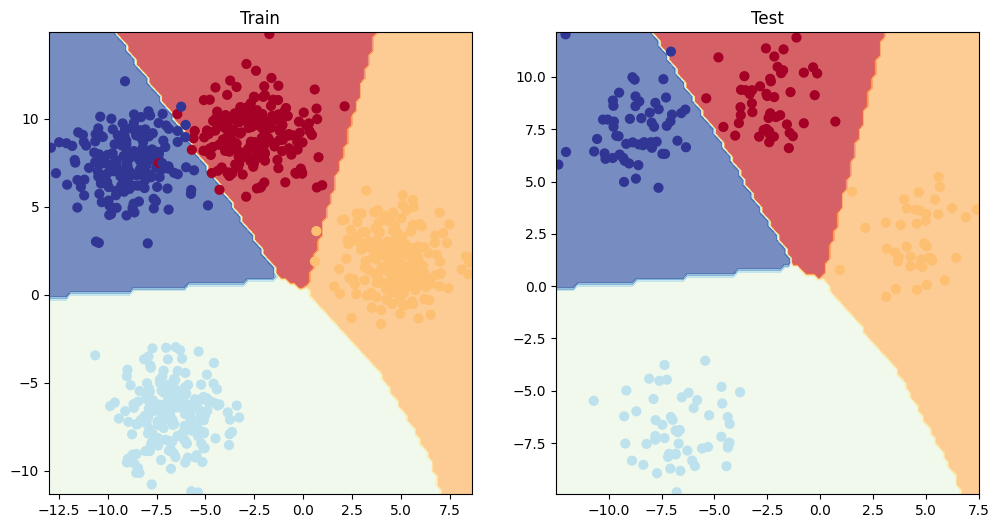

In [204]:
##visual
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,x_blob_test, y_blob_test)

##9 few mode clsssification techniques

https://medium.com/data-science/beyond-accuracy-precision-and-recall-3da06bea9f6c


In [205]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [213]:
from torchmetrics import Accuracy


torchmetric_accuracy = Accuracy(task='multiclass', num_classes=NUM_CLASSES).to(device)

#Calculate accuracy
torchmetric_accuracy(y_pred_probs, y_blob_test)

tensor(0.9950, device='cuda:0')